# Importing Libraries

In [50]:
import numpy as np
import math
import sympy as sp
import scipy.integrate as sci
import matplotlib.pyplot as plt

## function to Print matrix

In [51]:
def printMatrix(V,name='A'):
    print(f'{name} =\n')
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            print(f'{V[i][j]:8.4f}',end='  ')
        print()
    print()

# Spline function declaration and definition

In [52]:
def natural_cubic_spline(X,Y):

    n = len(X)     # n+1 points in X as per algorithm

    h = np.zeros(n) 

    for i in range(n-1):
        h[i] = X[i+1]-X[i]

    alphas = np.zeros(n-1)
    for i in range(1,n-1):
        alphas[i] = (3/h[i])*(Y[i+1]-Y[i]) - (3/h[i-1])*(Y[i]-Y[i-1])

        l = np.zeros(n)
        mu = np.zeros(n)
        z = np.zeros(n)

    for i in range(1,n-1):
        l[i] = 2*(X[i+1] - X[i-1]) - h[i]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alphas[i] - h[i-1]*z[i-1])/l[i]
    
    l[n-1] = 1
    z[n-1] = 0
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)

    for j in range(n-2,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = ((Y[j+1] - Y[j])/h[j]) - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    mat = []
    for i in range(n-1):
        mat.append([i,X[i],Y[i],b[i],c[i],d[i]])
    
    # Finding limits of each part of curve
    limits = []
    for i in range(1,n,1):
        limits.append([X[i-1],X[i]])
    
    # Finding Equations for each part of curve
    x = sp.Symbol('x', real = True)
    S = []
    for i in range(len(mat)-1):
        eq = mat[i][2]
        for j in range(3,len(mat[i])):
            eq += mat[i][j]*((x-X[i])**(j-2))
        # eq = sp.expand(eq)
        S.append(eq)
    
    lambdified_S = []
    for eq in S:
        lambdified_S.append(sp.lambdify(x,eq))

    # Finding Integration
    ans = 0
    for j,i in zip(range(len(lambdified_S)),range(1,n)):       
        f = lambdified_S[j]
        a = limits[i-1][0]
        b = limits[i-1][1]
        ans += sci.quad(f,a,b)[0]
        
    return ans,mat,limits,S,lambdified_S

## Function for plotting actual and approximate curves

In [53]:
def plotSpline(lambdified_equations,limits,X,Y):
    x = sp.Symbol('x', real = True)
    n = len(lambdified_equations)

    X_approx = []
    y_approx = []
    for i in range(n):
        X_t = np.linspace(limits[i][0],limits[i][1],2)
        Y_t = np.zeros(len(X_t))
        f = lambdified_equations[i]
        for j in range(len(X_t)):
            Y_t[j] = f(X_t[j])
            X_approx.append(X_t[j])
            y_approx.append(Y_t[j])
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.title("Actual Curve")
    plt.plot(X,Y,color='b',label='Actual')
    plt.subplot(1,3,2)
    plt.title("Approximate Curve")
    plt.plot(X_approx,y_approx,color='g',label='Approximated')

    plt.subplot(1,3,3)
    plt.title("Comparative Plot")
    plt.plot(X,Y,color='b',label='Actual')
    plt.plot(X_approx,y_approx,color='r',label='Approximated',linestyle='-.',linewidth=3)
    plt.legend()
    plt.show()

# Input Section

In [54]:
# X = np.array([0,1,2,3])
# Y = np.array([1,math.exp(1),math.exp(2),math.exp(3)])

X = np.array([ 0.9,  1.3,  1.9,  2.1,  2.6,  3. ,  3.9,  4.4,  4.7,  5. ,  6. ,
        7. ,  8. ,  9.2, 10.5, 11.3, 11.6, 12. , 12.6, 13. , 13.3])
Y = np.array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
       2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25])

# X = np.array([0.1,0.2,0.3,0.4])
# Y = np.array([-0.62049958,-0.28398668,0.00660095,0.24842440])

## Calling natural cubic spline function

In [55]:
result,matrix,limits,equations,lambdified_equations = natural_cubic_spline(X,Y)
print(f'Integration = {result}')

Integration = 22.358029659413436


## Visualizing curves

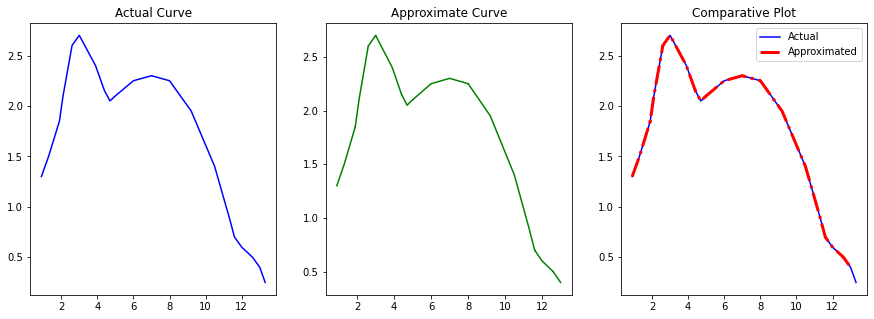

In [56]:
plotSpline(lambdified_equations,limits,X,Y)

## Priting Table

In [57]:
print('output format (i,x[i],a[i],b[i],c[i],d[i])')
printMatrix(matrix,'Coefficients Matrix = ')

output format (i,x[i],a[i],b[i],c[i],d[i])
Coefficients Matrix =  =

  0.0000    0.9000    1.3000    0.5353    0.0000   -0.2204  
  1.0000    1.3000    1.5000    0.4295   -0.2645    0.8682  
  2.0000    1.9000    1.8500    1.1017    1.2983   -2.7841  
  3.0000    2.1000    2.1000    1.2918   -0.3721   -0.4229  
  4.0000    2.6000    2.6000    0.5899   -1.0064    0.3914  
  5.0000    3.0000    2.7000   -0.0056   -0.5367    0.1918  
  6.0000    3.9000    2.4000   -0.5067   -0.0189    0.0646  
  7.0000    4.4000    2.1500   -0.4762    0.0779    1.3278  
  8.0000    4.7000    2.0500   -0.0710    1.2729   -1.6026  
  9.0000    5.0000    2.1000    0.2705   -0.1695    0.0490  
 10.0000    6.0000    2.2500    0.0786   -0.0224   -0.0061  
 11.0000    7.0000    2.3000    0.0153   -0.0408   -0.0246  
 12.0000    8.0000    2.2500   -0.1379   -0.1145    0.0176  
 13.0000    9.2000    1.9500   -0.3363   -0.0513   -0.0119  
 14.0000   10.5000    1.4000   -0.5344   -0.0975   -0.0196  
 15.0000   11.30

## Printing Equations

for i in range(len(equations)):
    print(f'\nEquation {i+1} = ')
    sp.pprint(equations[i])